<div style="background-color: lightgreen; padding: 10px; text-align: center; color: black; font-size: 32px; font-family: 'Arial', sans-serif;">
    New York City Yellow Cab: Processing Large Datasets<br>
    <h3 style="text-align: center; color: black; font-size: 15px; font-family: 'Arial', sans-serif;">Codebase and Documentation</h3>
</div>

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Problem statement
</h3> </div>

**NYC Yellow Cab is a big company run by NYC Taxi Cab Commission which handles many cabs and medallions each year. There are millions of trips every month with hundreds of millions of revenue. Raw data is all over the place and too messy. Cleaning and analyzing this data helps NYC stakeholders to see the details of these trips and ultimately the revenue in detail.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Importing necessary libraries and loading dataset
</h3> </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_parquet("yellow_tripdata_2025-01.parquet")

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Understanding the dataset
</h3> </div>

In [2]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [3]:
shape = df.shape
print("Shape(Rows,Columns):", shape)

Shape(Rows,Columns): (3475226, 20)


**Checking for duplicates**

In [4]:
normal = len(df)
df = df.drop_duplicates()
remove_dups = len(df)

print("Rows before:", normal)
print("Rows after:", remove_dups)
print("Duplicates removed:", normal - remove_dups)

Rows before: 3475226
Rows after: 3475226
Duplicates removed: 0


**Dataset has no duplicates.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**There are two columns with datatype as datetime in US format. 13 floats. 3 integer32 types and 1 integer1 types. It just means that int32 uses 32 bits to store in memory and int64 uses 64 bits.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Handling null values
</h3> </div>

In [6]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
cbd_congestion_fee            0
dtype: int64

**Passenger count, RatecodeID, store_andfwd_flag, congestion_surcharge and Airport_fee have null values.**

**RatecodeID:**

In the context of NYC taxi datasets, RatecodeID refers to the final rate code that was applied to a taxi trip at its completion. It's a categorical variable that indicates the type of fare structure used for the ride. 
Here's a breakdown of what the different RatecodeID values typically signify:
1. Standard rate: This applies to regular taxi trips within New York City limits where the fare is calculated based on time and distance.
2. JFK: This rate code is used for trips to and from John F. Kennedy International Airport (JFK).
3. Newark: This indicates trips to Newark Liberty International Airport (EWR).
4. Nassau or Westchester: This applies to trips that extend beyond the city limits into Nassau or Westchester counties.
5. Negotiated fare: This is used for trips where a fare was negotiated between the passenger and the driver, such as for trips outside the standard operating areas.
6. Group ride: This applies to trips where multiple passengers share the taxi, often with a predefined route or fare structure. 

**We will just fill this RatecodeID with 1**

**Passenger_count can be filled with 1 because using mean, median or mode might cause wrong values. This is the first thought.**

**Store_and_fwd_flag means if the trip information was stored temporarily, not a significant feature. Will drop the column is the first instinct.**

**Congestion surcharge and airport fees are extra fees only applied in particular rides, so any null values can be filled with 0.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Checking hypothesis by visualizing
</h3> </div>

**Let's visualize each column one by one and see what needs to be done.**

 <div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Passenger count
</h3> </div>

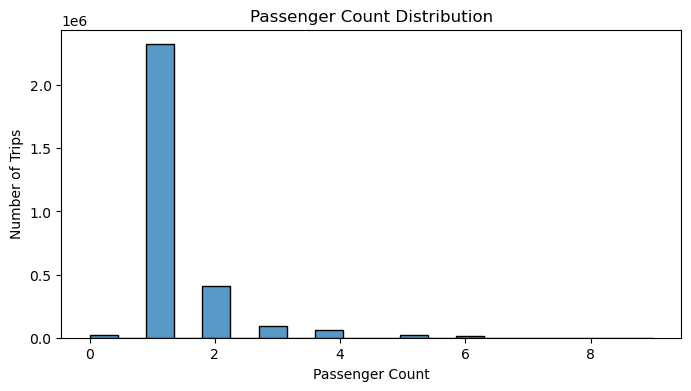

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df["passenger_count"], bins=20, kde=False)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()

**Like we thought, most passengers are 1 in number, so lets fill passenger null values with 1.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>RatecodeID
</h3> </div>

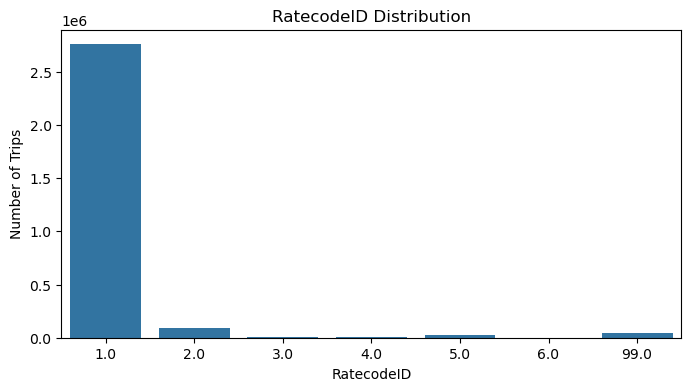

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x="RatecodeID", data=df)
plt.title("RatecodeID Distribution")
plt.xlabel("RatecodeID")
plt.ylabel("Number of Trips")
plt.show()

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Temporary storage of data or not
</h3> </div>

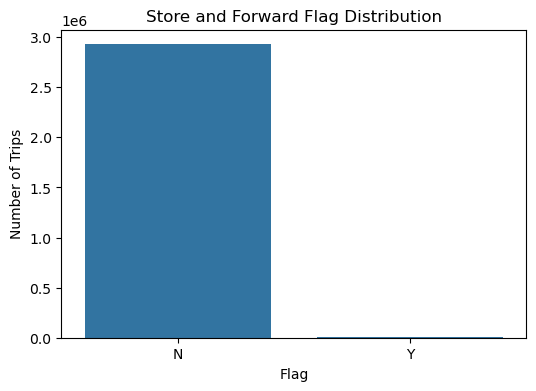

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="store_and_fwd_flag", data=df)
plt.title("Store and Forward Flag Distribution")
plt.xlabel("Flag")
plt.ylabel("Number of Trips")
plt.show()

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Congestion surcharge
</h3> </div>

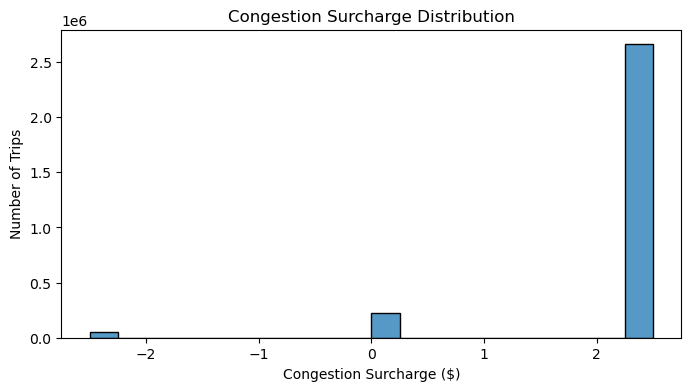

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df["congestion_surcharge"], bins=20, kde=False)
plt.title("Congestion Surcharge Distribution")
plt.xlabel("Congestion Surcharge ($)")
plt.ylabel("Number of Trips")
plt.show()


**There is more 0 which means most trips have no congestion surcharge, internet research shows that 2.50 is the official congestion fee for NY city. There are negative values too. which I need to see and handle later.**

**We will fill congestion surcharge null values with 0.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Airport fee
</h3> </div>

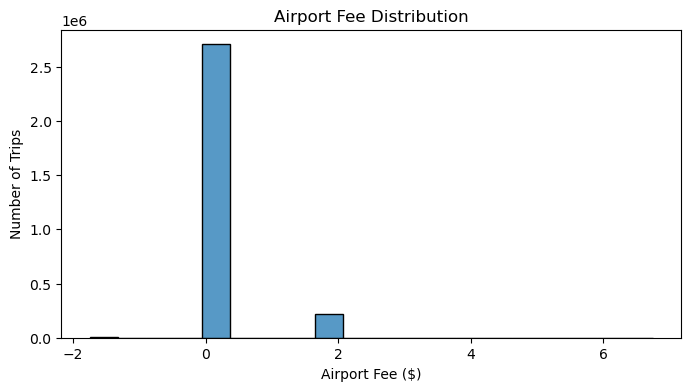

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df["Airport_fee"], bins=20, kde=False)
plt.title("Airport Fee Distribution")
plt.xlabel("Airport Fee ($)")
plt.ylabel("Number of Trips")
plt.show()

**Again airport fee is clearly 0 for most values. We see a bar around 2 too which could be fee for some airports in NY city like Newark or JFK. Overall we can fill the null values with 0 here, no problem. There should not be negative value here too. But there is just like in congestion. Could it be data entry mistakes? Or maybe refunds?**

**We can change all negatives to 0 instead.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Filling null values
</h3> </div>

In [12]:
df["passenger_count"]      = df["passenger_count"].fillna(1)
df["RatecodeID"]           = df["RatecodeID"].fillna(1)
df["store_and_fwd_flag"]   = df["store_and_fwd_flag"].fillna("N")
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)
df["Airport_fee"]          = df["Airport_fee"].fillna(0)

In [13]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
cbd_congestion_fee       0
dtype: int64

**No null values left**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Handling negatives
</h3> </div>

**We had some negative values too. lets use the .loc label based indexer and modify those negative values to 0.**

In [14]:
df.loc[df["congestion_surcharge"] < 0, "congestion_surcharge"] = 0
df.loc[df["Airport_fee"] < 0, "Airport_fee"] = 0

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Checking negatives
</h3> </div>

**Let's visualize these two columns again to see if any negative values are left.**

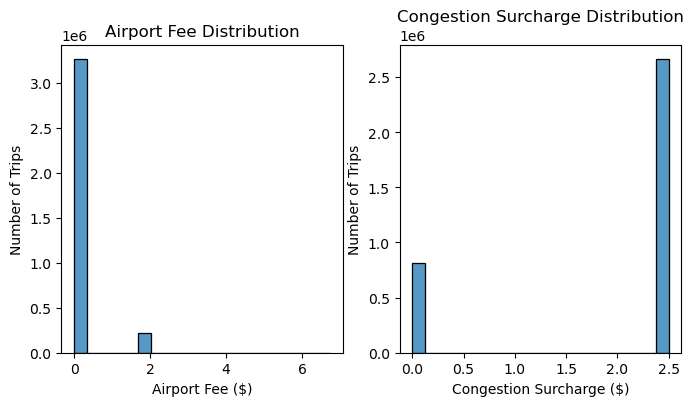

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df["Airport_fee"], bins=20, kde=False)
plt.title("Airport Fee Distribution")
plt.xlabel("Airport Fee ($)")
plt.ylabel("Number of Trips")


plt.subplot(1,2,2)
sns.histplot(df["congestion_surcharge"], bins=20, kde=False)
plt.title("Congestion Surcharge Distribution")
plt.xlabel("Congestion Surcharge ($)")
plt.ylabel("Number of Trips")
plt.show()


**No negative values left**



<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Standardizing date/time
</h3> </div>

**As we saw in our df.info earlier, datetime columns are already stored as datetime64[us] which is recognized as proper datetime. But as part of data cleaning, we should still standardize to follow the correct protocols.**

**We will convert the two columns to datetime with pandas**

In [16]:
df["tpep_pickup_datetime"]  = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Checking for outliers
</h3> </div>

**Now we check for outliers to see if there are trips with unusually high fares, negative distances or unrealistic trip durations.**

**Trip distance cannot be less that 0.**

**New York city is a small city, so within new york itself, very long trip distances like 70-80 miles could be outliers.**

**Again, fare amounts within NY city cannot be super high like hundreds of dollars.**

**Trip duration can be hardly upto 3 to 4 hours. New york city is not big enough for durations of over 5 hours.**

**Lets check for distributions for these.**

**For this, to see the trip duration: we will subtract pickup time from dropoff time to see the duration.**

**And then this will be assigned to a new column named trip_duration_min**

In [17]:
df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df["trip_duration_min"].head()

0    8.350000
1    2.550000
2    1.950000
3    5.566667
4    3.533333
Name: trip_duration_min, dtype: float64

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Finding outliers
</h3> </div>

In [18]:
Unrealistic_low_distance = (df["trip_distance"] <= 0).sum()
Unrealistic_high_distance = (df["trip_distance"] > 100).sum()

Unrealistic_low_fare = (df["fare_amount"] < 0).sum()
Unrealistic_high_fare = (df["fare_amount"] > 100).sum()

Unrealistic_low_duration = (df["trip_duration_min"] <= 0).sum()
Unrealistic_high_duration = (df["trip_duration_min"] > 360).sum()

print("Unrealistically low distance:", Unrealistic_low_distance)
print("Unrealistically high distance:", Unrealistic_high_distance)
print("Unrealistically low fare:", Unrealistic_low_fare)
print("Unrealistically high fare:", Unrealistic_high_fare)
print("Unrealistically_low_duration:", Unrealistic_low_duration)
print("Unrealistically_high_duration:", Unrealistic_high_duration)

Unrealistically low distance: 90893
Unrealistically high distance: 162
Unrealistically low fare: 144118
Unrealistically high fare: 8049
Unrealistically_low_duration: 2051
Unrealistically_high_duration: 1203


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>What we know so far?
</h3> </div>

**So now we know that:**

**Trip distance**

90,893 trips ≤ 0 miles

162 trips > 100 miles

**Fare amount**

144,118 trips < $0

8,049 trips > $500

**Trip duration**

2,051 trips ≤ 0 min

1,203 trips > 360 min

**These are all outliers, which will skew the analysis later on and we need to remove all the rows with these types of skewing values.**

**Lets create a condition to that and assign our dataframe with only the conditions we need. So basically, trip distance above 0 miles and below 100 miles, fare amount above 0 dollars and below 500 dollars, and trip duration above 0 minutes and below 6 hours or 360 minutes.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Creating favorable conditions to remove outliers
</h3> </div>

In [19]:
df = df[df["trip_distance"] > 0]
df = df[df["trip_distance"] <= 100]

df = df[df["fare_amount"] >= 0]
df = df[df["fare_amount"] <= 500]

df = df[df["trip_duration_min"] > 0]
df = df[df["trip_duration_min"] <= 360]

In [20]:
datashape_after_removing_outliers = df.shape
print("Datashape after removing the outliers(Rows,columns):",datashape_after_removing_outliers)

Datashape after removing the outliers(Rows,columns): (3251980, 21)


**So from our previous datshape of : Shape(Rows,Columns): (3475226, 20)**

**We are now at a datashape of: Datashape after removing the outliers(Rows,columns): (3251980, 21)**

**This means the outliers have been removed successfully.**

**Now we can proceed with storing the cleaned dataset.**


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Storing large dataset as parquet
</h3> </div>

**The last time I stored a dataset was during IMDb project using df.to_csv. We will now export our dataset to parquet format though because it is a large dataset.**

**Parquet is an open-source, columnar storage file format optimized for use with big data processing frameworks like Apache Hadoop and Apache Spark. Unlike traditional row-based formats such as CSV, Parquet organizes data by columns, meaning all values for a particular column are stored contiguously on disk.**

In [21]:
df.to_parquet("yellow_tripdata_2025-01_storedaftercleaning.parquet", index=False)

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>ETL
</h3> </div>

**Thus we performed ETL using Pandas:**

1. **Extract: Loaded the raw dataset.**
2. **Transfrom: Filled null values, fixed negative values, standardized date and time, and removed outliers.**
3. **Load: Stored the clean dataset as a parquet file using df.to_parquet().**


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>ETL pipeline
</h3> </div>

**This is the markdown of the ETL pipeline created using pandas available as a separate codefile**

import pandas as pd

def nyc_etl_pipeline(input_file, output_file):
        
    df = pd.read_parquet(input_file)
    
   
    df["passenger_count"]      = df["passenger_count"].fillna(1)
    df["RatecodeID"]           = df["RatecodeID"].fillna(1)
    df["store_and_fwd_flag"]   = df["store_and_fwd_flag"].fillna("N")
    df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)
    df["Airport_fee"]          = df["Airport_fee"].fillna(0)

   
    df.loc[df["congestion_surcharge"] < 0, "congestion_surcharge"] = 0
    df.loc[df["Airport_fee"] < 0, "Airport_fee"] = 0

   
    df["tpep_pickup_datetime"]  = pd.to_datetime(df["tpep_pickup_datetime"])
    df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
    df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

  
    df = df[df["trip_distance"] > 0]
    df = df[df["trip_distance"] <= 100]
    df = df[df["fare_amount"] >= 0]
    df = df[df["fare_amount"] <= 500]
    df = df[df["trip_duration_min"] > 0]
    df = df[df["trip_duration_min"] <= 360]
    
    
    df.to_parquet(output_file, index=False)
    print("Clean dataset after ETL saved as:output_file")
    
    return df


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Trip Pattern and Demand Analysis
</h3> </div>

**Lets analyze the following things in ridership:**

1. **Daily and hourly peak periods**
2. **Weekday vs Weekend Patterns**
3. **Season variations**

This is a temporal analysis. Temporal analysis is the process of examining data collected over time to identify patterns, trends, and relationships.

Here we are examining to identify daily and hourly patterns, weekday and weekend patterns and variations with seasons.



**We will also use plots to actually see these analyses that we do.**


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Trips by hour of day
</h3> </div>

**The time of pickup is available. WE need to just extract a particular hour of the day from that to see which was the hour when the demand was high.**

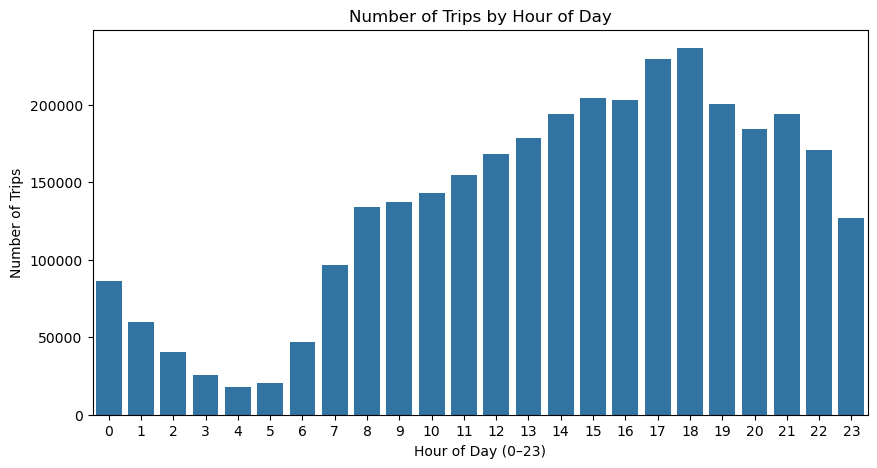

In [22]:
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

hourly_trips = df["pickup_hour"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.show()

**So the lowest trip was around late midnight, 3 to 5 am. As it increases at 6 am, 4 to 7 pm is the most as we see in 1700 hours to 1900 hours.**

**This is typical of a busy and bustling city like NY where people hardly sleep except the few hours after midnight.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Trips by the day of the week
</h3> </div>

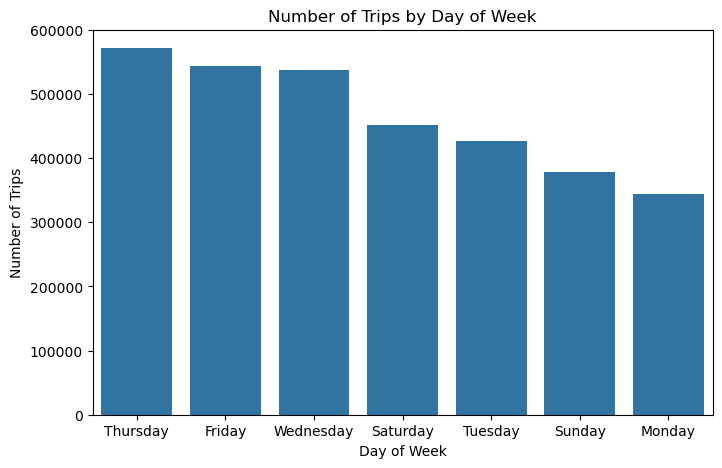

In [23]:
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()

weekday_trips = df["pickup_day"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_trips.index, y=weekday_trips.values)
plt.title("Number of Trips by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

**Busiest days are Wednesday, Thursday and Friday. There is less demand on Sunday and Monday. Weekend - Friday and Saturday clearly show demand. Also in the US, Thursday is often considered early weekend in the US where people start making travel plans, which we can see by the demand here. People are travelling more on Thursday because the work load is less on Friday.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Number of trips by date
</h3> </div>

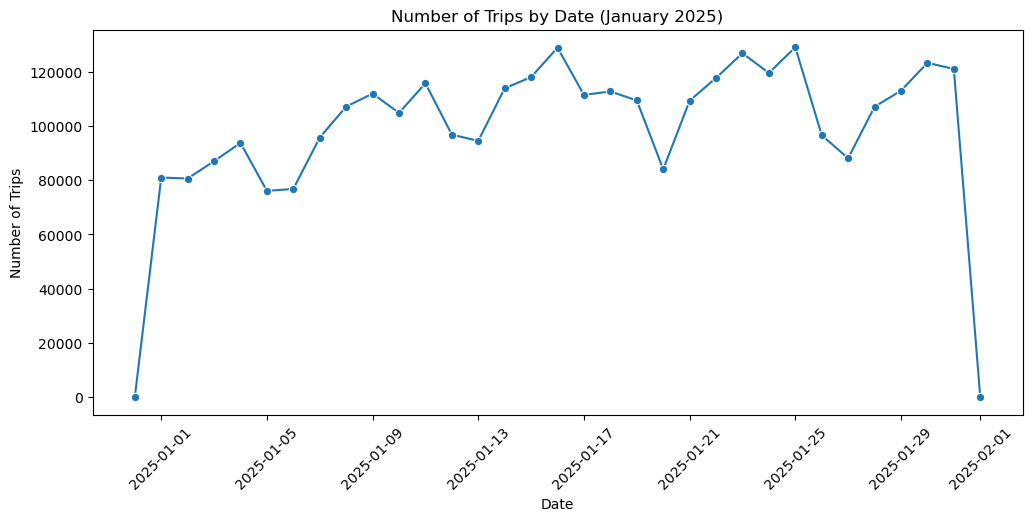

In [24]:
df["pickup_date"] = df["tpep_pickup_datetime"].dt.date

daily_trips = df["pickup_date"].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=daily_trips.index, y=daily_trips.values, marker="o")
plt.title("Number of Trips by Date (January 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

**So we see that the days have on average 100k trips. We are comparing weeks within months so the early uptick and late downtick is because of last month and upcoming month.**

**Up and down of the line is consistent with what we saw in the weekday weekend visualization.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Fare amount distribution
</h3> </div>

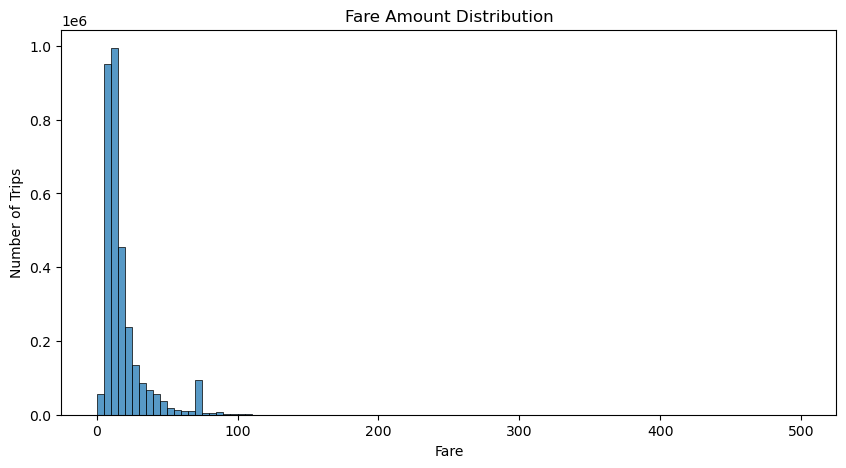

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df["fare_amount"], bins=100, kde=False)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare")
plt.ylabel("Number of Trips")
plt.show()

**There is hardly anything to see beyond 100. We already cleared out the outliers but the histogram will still show upto 500. To bring the width of X axis to less, lets use xlim to bring the range from 0 to 100. It is more practical and real life.**

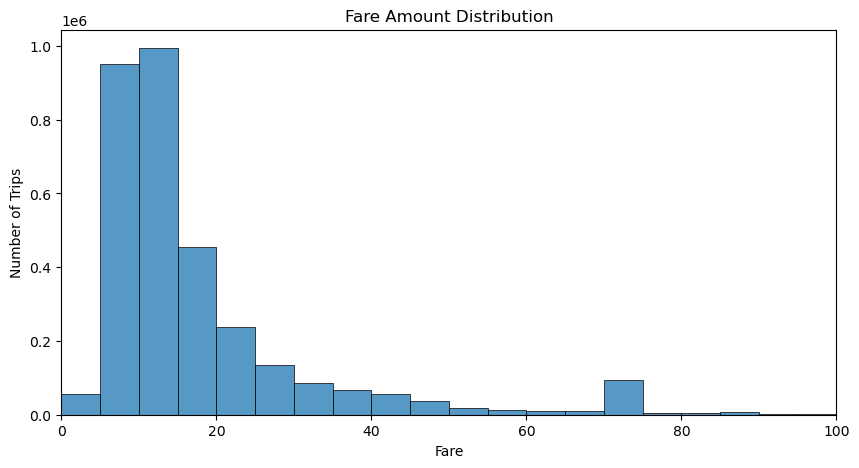

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df["fare_amount"], bins=100, kde=False)
plt.xlim(0, 100) 
plt.title("Fare Amount Distribution")
plt.xlabel("Fare")
plt.ylabel("Number of Trips")
plt.show()

**Now that we used xlim to zoom into less than 100, we see that peaks are more in 10 to 15 dollars. It is still right skewed. Expensive trips are less. But we still know that general trend. The fares are more realistic now.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Total Revenue and Average Fare
</h3> </div>

In [27]:
total_revenue = df["fare_amount"].sum()
average_fare = df["fare_amount"].mean()

print("Total Revenue:", total_revenue)
print("Average Fare per Trip:", average_fare)


Total Revenue: 58344986.86000003
Average Fare per Trip: 17.941373212627393


**So total revenue of almost 58 million dollars gives us the total revenue in the month of January and the average fare per trip of almost 18 dollars shows what a customer usually pays on a trip.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Grouping by Borough or Location
</h3> </div>

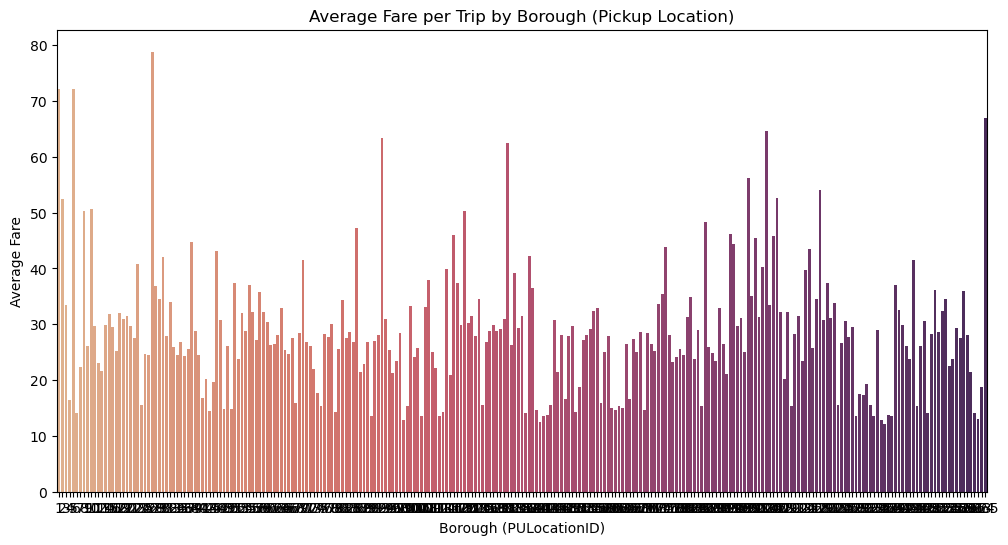

In [28]:
borough_fares = df.groupby("PULocationID")["fare_amount"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=borough_fares.index, y=borough_fares.values, palette="flare")
plt.title("Average Fare per Trip by Borough (Pickup Location)")
plt.xlabel("Borough (PULocationID)")
plt.ylabel("Average Fare")
plt.show()


**As we can see above, the different ID locations have different average fares in variation. New York City has over 260 taxi zones, so the bar looks too crowded. Although we cannot exactly identify which zones have the highest average fares, we see that some zones have higher averages and most zones are usually around the 30 dollars mark.**


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Revenue by payment method
</h3> </div>

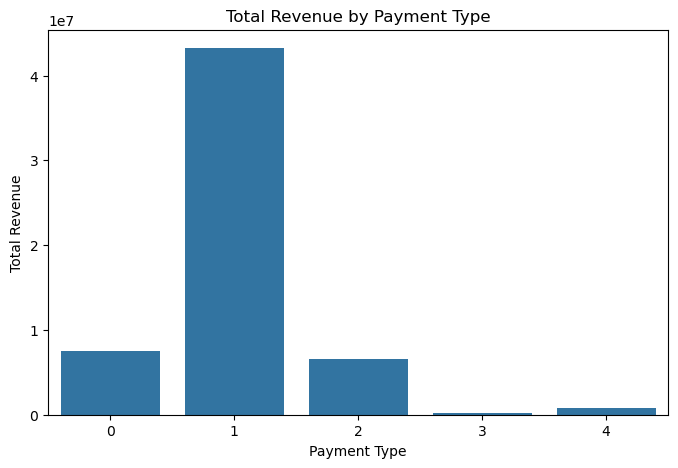

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x="payment_type", y="fare_amount", data=df, estimator="sum", ci=None)
plt.title("Total Revenue by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Total Revenue")
plt.show()

**In the new york taxi dataset, The most current data dictionaries list the following numerical codes and their corresponding payment types:**

1: Credit card

2: Cash

3: No charge

4: Dispute

5: Unknown

6: Voided trip

0: Flex Fare trip (introduced in 2025) 

**We see that credit card and flex fare trip dominate this payment method. People are more likely to pay using credit card.**

**Flex Fare trip in a New York City taxi is a type of upfront, fixed-price fare for yellow taxis, similar to what is offered by ride-hailing apps like Uber and Lyft. This pilot program, proposed to become permanent by the NYC Taxi and Limousine Commission (TLC), allows passengers to see the total fare before the trip begins, providing a predictable cost rather than a metered fare that can change based on traffic or distance.**

**Cash is still the third most used option.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Revenue by Trip distance
</h3> </div>

**For this, lets create distance bins. Since Distance is a continuous value, we will bring them to a range and group into categories like short, medium, long and very long. Using pd.cut() and splitting the column into bins of our favor so that we can easily plot this in a way that is good for visualization and analysis.**

In [30]:
bins = [0, 2, 5, 10, 100]
labels = ["Short (0-2 mi)", "Medium (2-5 mi)", "Long (5-10 mi)", "Very Long (10+ mi)"]
df["distance_bins"] = pd.cut(df["trip_distance"], bins=bins, labels=labels, right=True)

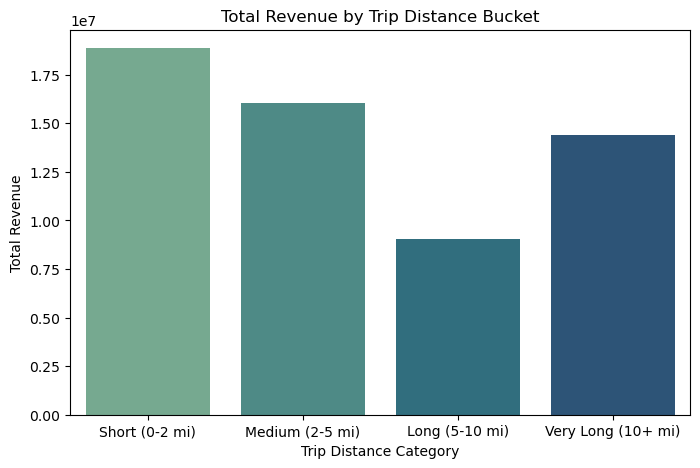

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x="distance_bins", y="fare_amount", data=df, estimator="sum", ci=None, palette="crest")
plt.title("Total Revenue by Trip Distance Bucket")
plt.xlabel("Trip Distance Category")
plt.ylabel("Total Revenue")
plt.show()

**We see that short trips bring the highest revenue. Very long trips are also not disappointing. They do bring more revenue that long trips probably because it could be between airports and homes.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Conclusion
</h3> </div>

In conclusion, handling the NYC taxi cab dataset was an experience. There were many hurdles along the way especially in being able to work with pyspark. A small attempt was made but Pandas came in handy as it was able to process data with millions of rows too. 

Although the dataset did not have any duplicates, it did come with a lot of null values in multiple columns. As these features were important for the analysis that I was planning to do, dropping them was not an option. Hypotheses were made about how to handle them. Data was analysed well before coming to any decision which was a good learning curve. 

Interesting aspect was coming across negative values in financial terms, like negative airport surcharge. Although the actual reason will remain a mystery, thinking over it if it was a refund issue or a data entry issue and handling them was challenging. 

Although date and time were already in US format, still forcing them to the datetime format as needed was done. 

It was amazing to see how unrealistically high and low values are usually present in a dataset. This could be an indication of lack of proper funding to enter the datas, or system issues. Although some of them could have been real but 90893 distances of under zero is clearly not acceptable in a big corporation like NYC taxi commission.

Data was stored in an amazon s3 bucket and ETL pipeline was created to extract from the local storage. Pyspark was not used, thus despite storing the dataset in s3 bucket, only local pipeline was developed. 

Temporal analysis was done to identify patterns, trends and relationships. Having been the first project to analyse and visualize trends and patterns over a course of time, it was a good experience was well to learn and make mistakes and debug. 

Grouping distances into categories created was a reminder of the basics of creating labels and bins. 

This analysis gave an idea into how to optimize taxi numbers during peak hours like evening, making a weekend vs weekday strategy, making system more robust and better for credit card and flexfare transactions, rethinking about surcharges as well. 